### Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends but not seasonality time series. In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta.

In [ ]:
#Alpha: Smoothing factor for the level.
#Beta: Smoothing factor for the trend.
#Trend Type: Additive or multiplicative.
#Dampen Type: Additive or multiplicative.
#Phi: Damping coefficient.

In [1]:
import os
import numpy as np
from pandas import read_excel
from matplotlib import pyplot as plt
    from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error 
from math import sqrt 


In [2]:
os.chdir("C:\\Users\\satish\\Desktop")

In [3]:
series = read_excel("TSF_data.xlsx", sheet_name = "DES")
train = series.iloc[0:15]
test = series.iloc[15:]


In [4]:
# using Holt's linear model predict for test set
y_hat = test.copy()
fit = Holt(np.asanyarray(train['y'])).fit(smoothing_level = 0.5, smoothing_slope = 0.9, damping_slope = 0.9, optimized=False)
y_hat['Holt_linear'] = fit.forecast(len(test))
y_hat


C:\Users\satish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-4-50079a341469>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit = Holt(np.asanyarray(train['y'])).fit(smoothing_level = 0.5, smoothing_slope = 0.9, damping_slope = 0.9, optimized=False)
C:\Users\satish\anaconda3\lib\site-packages\pandas\util\_decorators.py:199: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)


,t,y,Holt_linear
15,16,147,147.421337
16,17,148,150.615817
17,18,160,153.810298
18,19,165,157.004779
19,20,169,160.199259


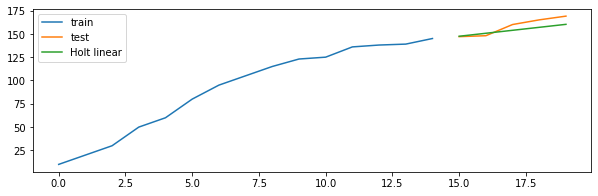

In [5]:
# plot the forecast
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['Holt_linear'], label='Holt linear')
plt.legend(loc='best')
plt.show()


In [6]:
# compute the error
rmse=sqrt(mean_squared_error(test.y, y_hat['Holt_linear']))
print(rmse)


6.110794430278249


### DES provides forecast when historical data has trend but not seasonal information. The algorithm calculation estimate value for levels and trends. Here the forecasting model updates its estimation of the level at each period based on two pieces of information: the last observation and the previous level estimation increased by the trend